In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import date
import os

In [9]:
PCA_per_TF = pd.read_csv('../exp/'+str(date.today())+'/PCA_results.csv')
#PCA_per_TF = PCA_per_TF.replace(['embryonic day 15.5','embryonic day 18.5','postnatal day 0.5','postnatal day 4','postnatal day 22','postnatal day 29'],[-5.5,-2.5,0.5,2,22,29])
PCA_per_TF = PCA_per_TF.set_index(['organ','dev_stage'])
PCA_per_TF.sort_index(inplace=True)


p_vals = pd.DataFrame(index=PCA_per_TF.T.index, columns=['C(organ)','C(dev_stage)','C(organ):C(dev_stage)'])
for TF in p_vals.index:
    test_data = pd.DataFrame(PCA_per_TF.loc[:,TF])
    test_data = test_data.reset_index()
    test_data.columns = ["organ", "dev_stage", "TF_expr"]
    data = test_data
    TF_lm = ols('TF_expr ~ C(organ)+C(dev_stage)+C(organ):C(dev_stage)', data=data).fit()
    table = sm.stats.anova_lm(TF_lm, typ=2)
    p_vals.loc[TF,'C(organ)'] = table.iloc[0,3]
    p_vals.loc[TF,'C(dev_stage)'] = table.iloc[1,3]
    p_vals.loc[TF,'C(organ):C(dev_stage)'] = table.iloc[2,3]
    p_vals.index.name = 'TF'
p_vals

,C(organ),C(dev_stage),C(organ):C(dev_stage)
TF,,,
Acaa2,0.153573,0.843688,0.234084
Acss2,0.00852221,0.677961,0.181684
Actb,0.00256241,0.32524,0.213794
Adnp,0.00213663,0.686789,0.238376
Aebp2,0.000649442,0.641234,0.221934
...,...,...,...
Zic3,0.000199331,0.592143,0.225363
Zkscan1,0.00394278,0.687029,0.242536
Zmiz1,0.0134689,0.747832,0.22998


In [6]:
p_vals.sort_values(by='C(organ):C(dev_stage)',axis=0)

,C(organ),C(dev_stage),C(organ):C(dev_stage)
TF,,,
Brf2,2.17834e-05,0.477071,0.032478
Cux2,3.82307e-07,0.870393,0.0363254
Yy2,0.00290153,0.428129,0.0429588
Dnajc2,0.00021673,0.249549,0.0523929
Was,0.0227649,0.614108,0.0668092
...,...,...,...
Hoxc10,7.33622e-05,0.705542,0.464494
Med23,1.68897e-06,0.0768849,0.632663
Hnrnpk,1.77818e-07,0.00630496,0.695905


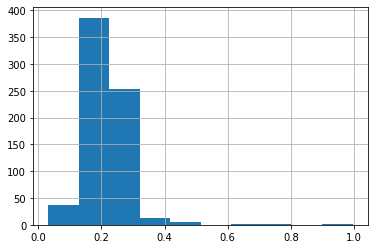

In [16]:
p_vals.loc[:,'C(organ):C(dev_stage)'].hist()

In [7]:
try:
    p_vals.to_csv('../exp/'+str(date.today())+'/p_vals.csv')
except FileNotFoundError:
    os.mkdir('../exp/'+str(date.today()))
    p_vals.to_csv('../exp/'+str(date.today())+'/p_vals.csv')
